### Imported relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read the file and add column headers

In [2]:
df = pd.read_csv("train_FD001.txt",sep=" ",
                 
    names=["unit_number","time","sen1","sen2","sen3","T2","T24","T30","T50","P2","P15","P30","Nf","Nc","epr","Ps30","phi","NRf","NRc","BPR","farB","htBleed","Nf_dmd","PCNfR_dmd","W31","W32","null1","null2"])

In [3]:
#There were 28 rows including the blanks at the end of the dataset in the txt file
df.head()

,unit_number,time,sen1,sen2,sen3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,null1,null2
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


### Checking count of null values in the dataset

In [4]:
df.isnull().sum()

unit_number        0
time               0
sen1               0
sen2               0
sen3               0
T2                 0
T24                0
T30                0
T50                0
P2                 0
P15                0
P30                0
Nf                 0
Nc                 0
epr                0
Ps30               0
phi                0
NRf                0
NRc                0
BPR                0
farB               0
htBleed            0
Nf_dmd             0
PCNfR_dmd          0
W31                0
W32                0
null1          20631
null2          20631
dtype: int64

In [5]:
# Eliminating the columns with the null values 
df.dropna(axis=1,inplace=True)

In [6]:
df.head()

,unit_number,time,sen1,sen2,sen3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
df.isnull().sum()

unit_number    0
time           0
sen1           0
sen2           0
sen3           0
T2             0
T24            0
T30            0
T50            0
P2             0
P15            0
P30            0
Nf             0
Nc             0
epr            0
Ps30           0
phi            0
NRf            0
NRc            0
BPR            0
farB           0
htBleed        0
Nf_dmd         0
PCNfR_dmd      0
W31            0
W32            0
dtype: int64

### Statistical data about the Operational setting

In [8]:
df.describe()[["sen1","sen2","sen3"]]

,sen1,sen2,sen3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


### Insights into the 3 Operational Settings
Here we come across that "sen3" is a constant number in all the units and hence it will not contribute much to the model but eliminating it doesn't make sense because we can use the same code for the other datasets where there is a chance of variability in the number.

### Importing preprocessing to standardize the the two values for a better understanding

In [9]:
from sklearn import preprocessing

x_operator=df[["sen1","sen2", "sen3"]]

x_scaled = preprocessing.scale(x_operator)

In [10]:
x_scaled

array([[-0.31597968, -1.3729532 ,  0.        ],
       [ 0.87272193, -1.03172035,  0.        ],
       [-1.96187421,  1.01567674,  0.        ],
       ...,
       [ 0.18693254, -0.00802181,  0.        ],
       [-0.49885685,  1.01567674,  0.        ],
       [-1.458962  , -1.71418605,  0.        ]])

In [11]:
df.columns

Index(['unit_number', 'time', 'sen1', 'sen2', 'sen3', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')

In [12]:
df.describe()[['T2', 'T24', 'T30', 'T50', 'P2',
       'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30']]

,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30
count,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000
mean,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,47.541168
std,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,0.267087
min,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,46.850000
25%,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,47.350000
50%,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,47.510000
75%,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,47.700000
max,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,48.530000


In [13]:
df.describe()[['phi', 'NRf', 'NRc', 'BPR',
       'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']]

,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


### Dropping columns which won't affect the model

In [14]:
df.drop(['T2','P2','P15','epr','farB','Nf_dmd','PCNfR_dmd'],axis=1,inplace=True)

In [15]:
df.head()

,unit_number,time,sen1,sen2,sen3,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [16]:
df.columns

Index(['unit_number', 'time', 'sen1', 'sen2', 'sen3', 'T24', 'T30', 'T50',
       'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31',
       'W32'],
      dtype='object')

### Standardization of the values for a better understanding of trends

In [17]:
from sklearn import preprocessing

In [18]:
x_dataset=df[df.columns[2:]]

x_scaled = preprocessing.scale(x_dataset)
x_scaled

array([[-0.31597968, -1.3729532 ,  0.        , ..., -0.78170979,
         1.34849274,  1.19442705],
       [ 0.87272193, -1.03172035,  0.        , ..., -0.78170979,
         1.01652793,  1.23692196],
       [-1.96187421,  1.01567674,  0.        , ..., -2.07309423,
         0.73989059,  0.50342281],
       ...,
       [ 0.18693254, -0.00802181,  0.        , ...,  3.09244354,
        -2.08181033, -3.29248147],
       [-0.49885685,  1.01567674,  0.        , ...,  1.15536688,
        -2.91172236, -2.08507166],
       [-1.458962  , -1.71418605,  0.        , ...,  1.8010591 ,
        -2.46910261, -2.19408035]])

In [19]:
df1 = pd.DataFrame(data=x_scaled,columns=df.columns[2:])

In [20]:
df1.head()

,sen1,sen2,sen3,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
0,-0.315980,-1.372953,0.0,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,0.872722,-1.031720,0.0,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,-1.961874,1.015677,0.0,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,0.324090,-0.008022,0.0,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,-0.864611,-0.690488,0.0,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552


### Adding columns 

In [21]:
df1[['unit_number', 'time']] = df[['unit_number', 'time']]

In [22]:
df1.head()

,sen1,sen2,sen3,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,unit_number,time
0,-0.315980,-1.372953,0.0,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427,1,1
1,0.872722,-1.031720,0.0,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922,1,2
2,-1.961874,1.015677,0.0,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423,1,3
3,0.324090,-0.008022,0.0,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792,1,4
4,-0.864611,-0.690488,0.0,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552,1,5


In [23]:
cols = df1.columns.tolist()
cols

['sen1',
 'sen2',
 'sen3',
 'T24',
 'T30',
 'T50',
 'P30',
 'Nf',
 'Nc',
 'Ps30',
 'phi',
 'NRf',
 'NRc',
 'BPR',
 'htBleed',
 'W31',
 'W32',
 'unit_number',
 'time']

In [24]:
cols =cols[-2:] + cols[:-2]
cols

['unit_number',
 'time',
 'sen1',
 'sen2',
 'sen3',
 'T24',
 'T30',
 'T50',
 'P30',
 'Nf',
 'Nc',
 'Ps30',
 'phi',
 'NRf',
 'NRc',
 'BPR',
 'htBleed',
 'W31',
 'W32']

In [25]:
df = df1[cols]

In [26]:
df.head()

,unit_number,time,sen1,sen2,sen3,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
0,1,1,-0.315980,-1.372953,0.0,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,1,2,0.872722,-1.031720,0.0,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,1,3,-1.961874,1.015677,0.0,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,1,4,0.324090,-0.008022,0.0,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,1,5,-0.864611,-0.690488,0.0,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552


### Correlation Matrix of all columns

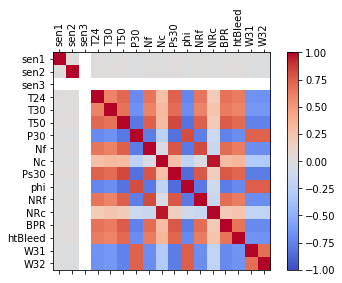

In [27]:
# Taking the dataframe and dropping the columns which aren't sensors
data = df.drop(['unit_number', 'time'],axis=1)
# using the correlation methods
corr = data.corr()

# plotting the graph
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.savefig('withoperationsetting.png')
plt.show()



### Correlation Matrix of Sensors only

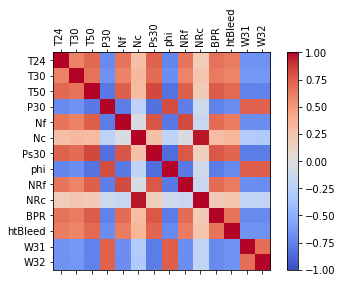

In [28]:
# Taking the dataframe and dropping the columns which aren't sensors
data = df.drop(['unit_number', 'time', 'sen1', 'sen2','sen3'],axis=1)
# using the correlation methods
corr = data.corr()

# plotting the graph
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.savefig('onlyrelevantsensors.png')
plt.show()




Here we get to know that the the sensors are either highly correlated (i.e. red hue) or inversely correlated (i.e. blue hue) but we also see that the Fan Speeds are less correlated in comparison to other sensors.

In [29]:
import random
v = random.sample(range(1, 100), 7)

In [30]:
d = {}
for name in v:
    d[name] = pd.DataFrame(data= df.loc[df['unit_number'] == name],columns=df.columns.tolist())

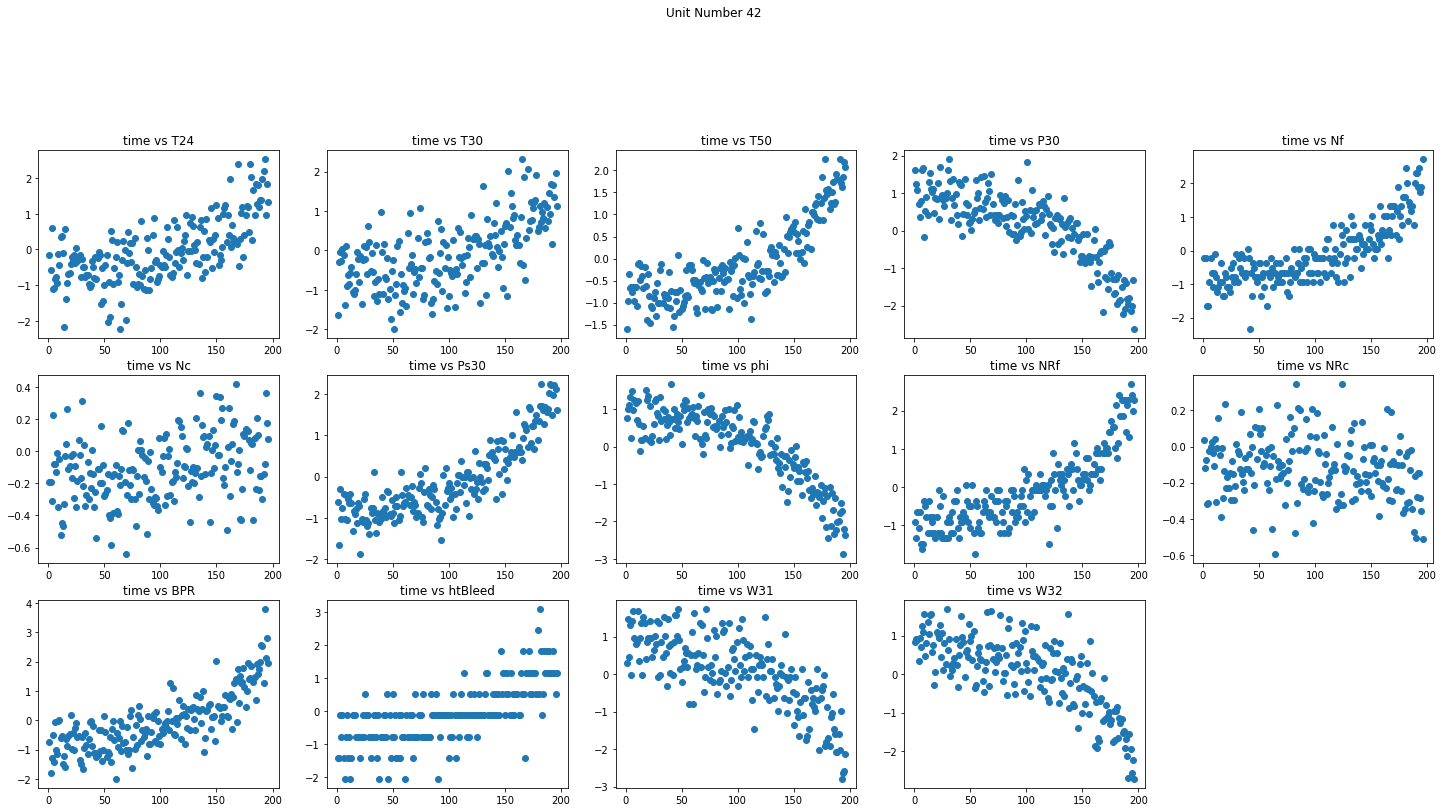

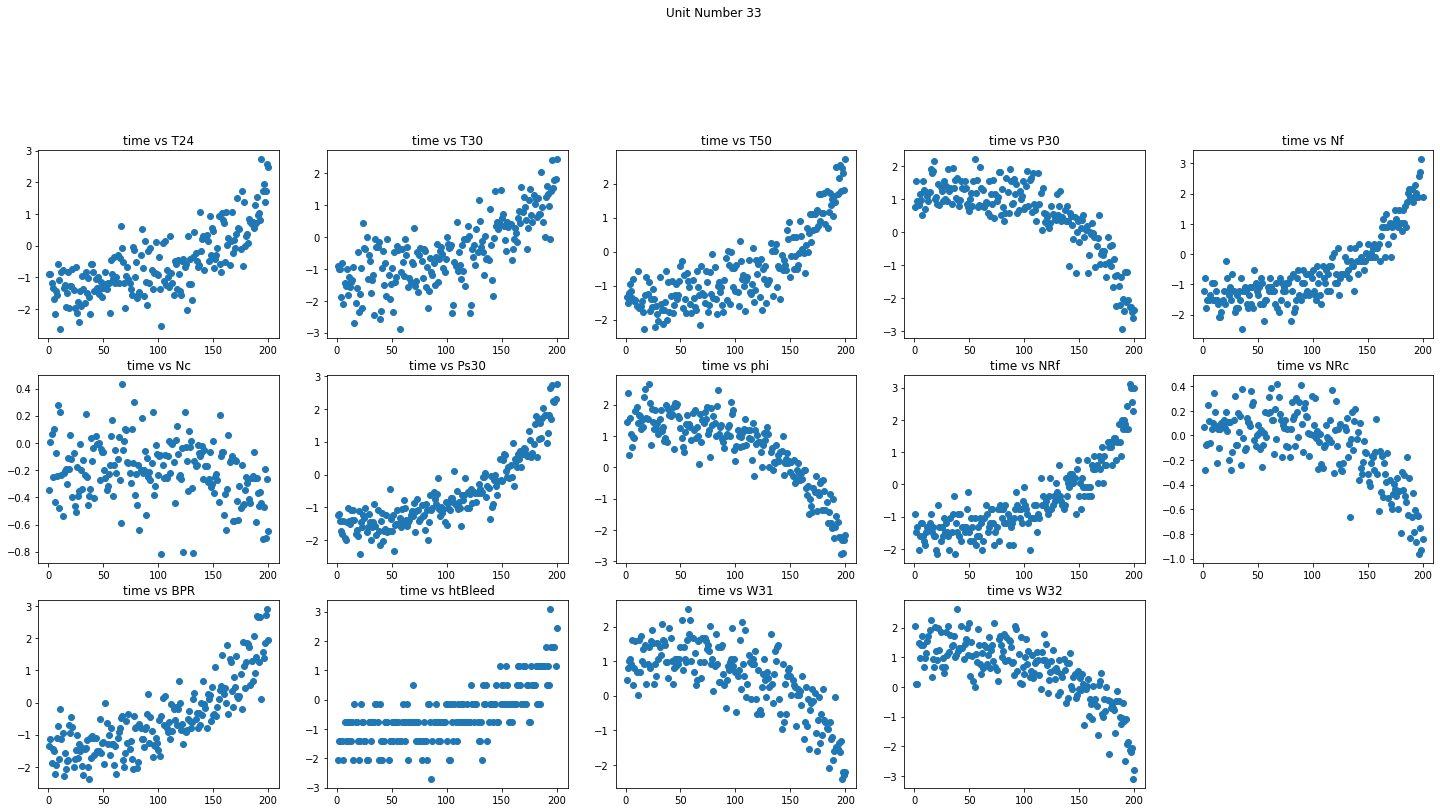

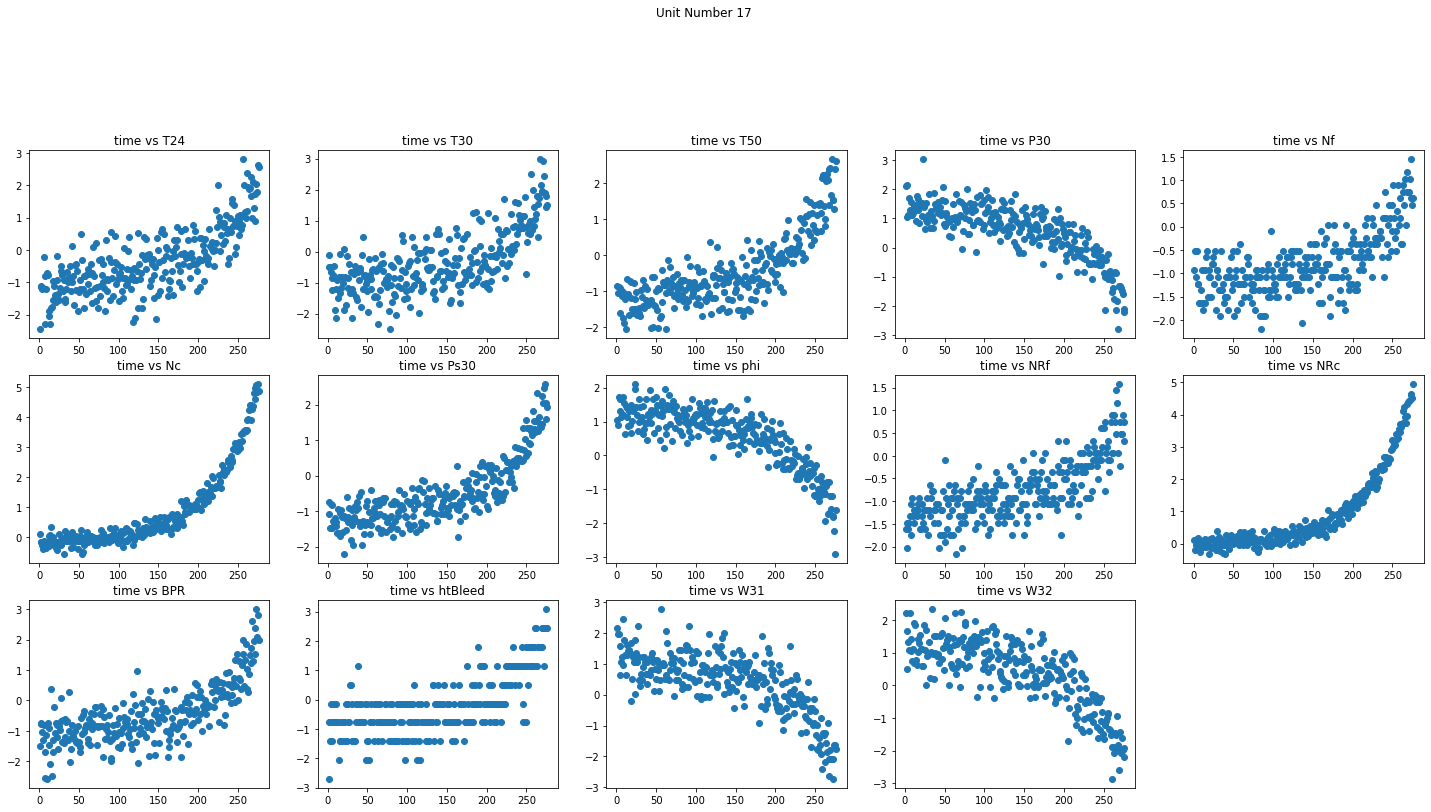

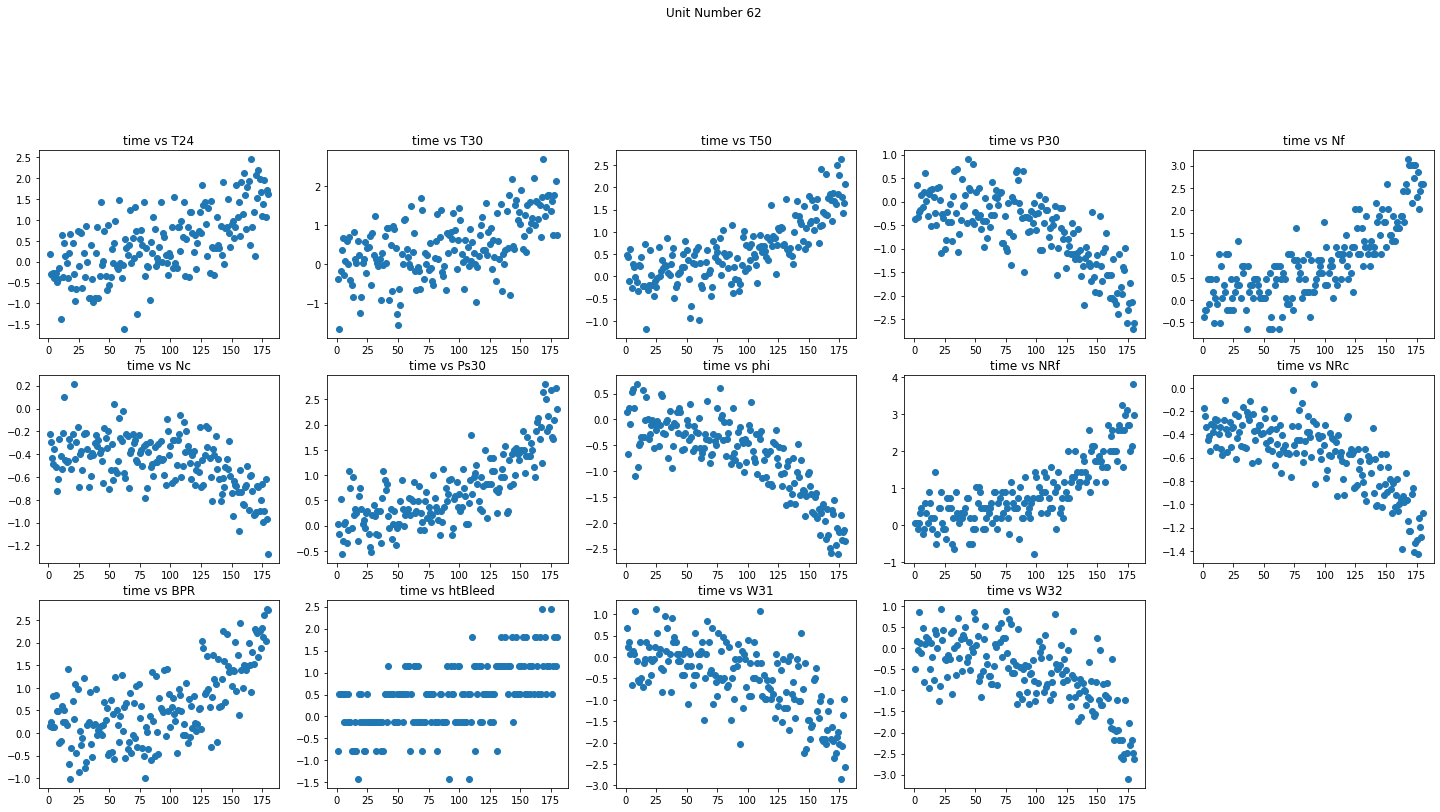

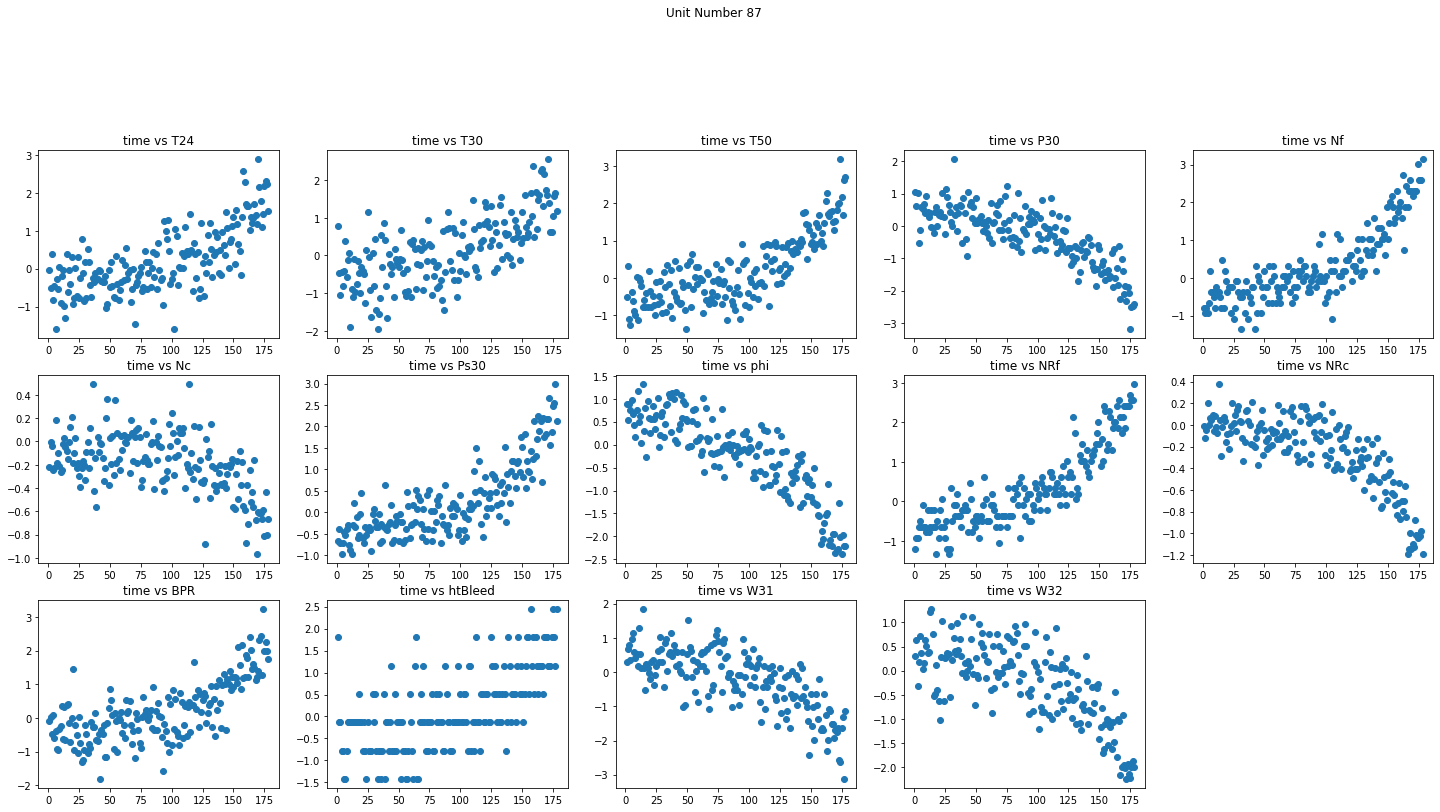

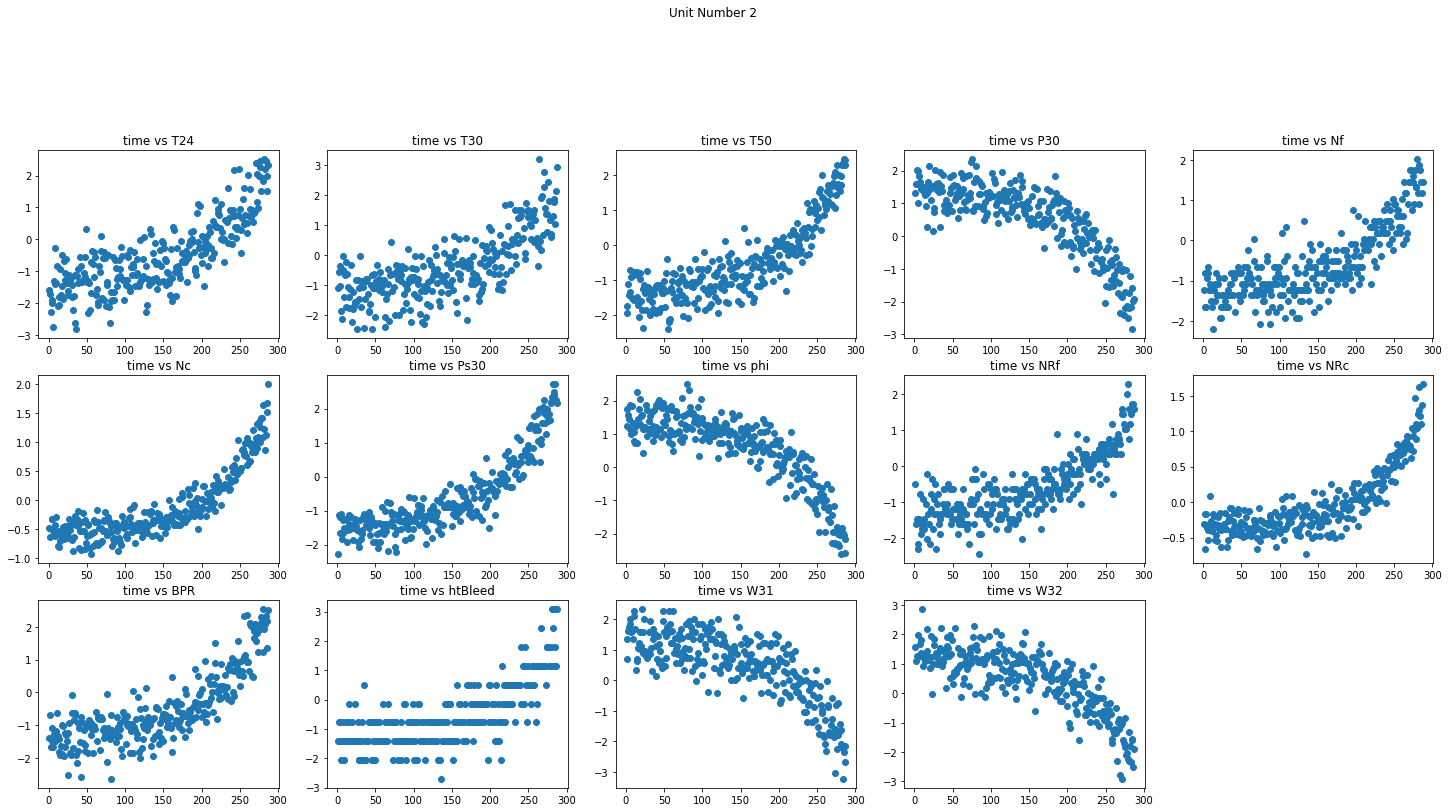

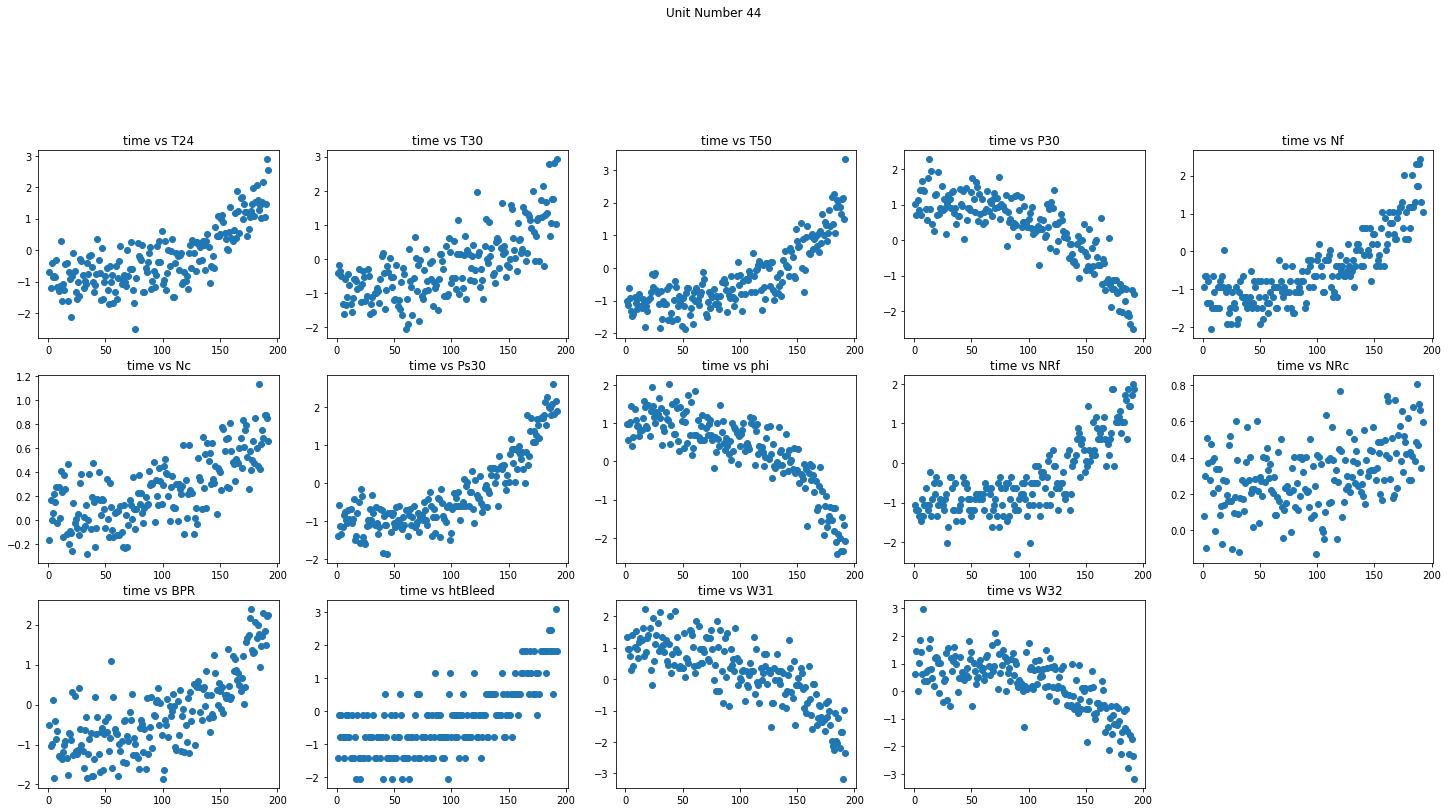

In [31]:
for i in v:
    fig = plt.figure(figsize=(25,20))
    
    for j,k in zip(df.columns[5:],range(1,26)):
        ax = fig.add_subplot(5,5,k)
        ax.scatter(df.loc[df['unit_number']==i]['time'],df.loc[df['unit_number']==i][j])
        ax.title.set_text(f'time vs {j}')
    fig.suptitle(f'Unit Number {i}')   
    plt.show()

### Training Model

In [32]:
# 'P30', 'Nf','Nc','NRc','htBleed', 'W31', 'W32' 'T30''T24'
x_sensor = df[['T24', 'T30','T50',
       'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31',
       'W32']]
y_para1 = df['time']

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x_sensor_train,x_sensor_test,y_para1_train,y_para1_test = train_test_split(x_sensor,y_para1,
                                                                          test_size=0.2)

In [34]:
reg = LinearRegression().fit(x_sensor_train,y_para1_train)

In [35]:
reg.score(x_sensor_train,y_para1_train)

0.5193295148575559

In [36]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_sensor_train,y_para1_train)


RandomForestRegressor()

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
sensor_pred = forest_reg.predict(x_sensor_test)
forest_mse = mean_squared_error(y_para1_test,sensor_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

43.126791534093975

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg,x_sensor_train,y_para1_train,
                        scoring="neg_mean_squared_error",cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [40]:
tree_rmse_scores

array([44.56561211, 43.01635321, 43.53052313, 43.23479871, 43.51072601])

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [4, 6, 8, 10]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()

In [43]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)


In [44]:
grid_search.fit(x_sensor_train,y_para1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 8, 10],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.03177732, 0.04288183, 0.09155987, 0.07575263, 0.02470222,
       0.12263423, 0.21471425, 0.10590681, 0.02596759, 0.091944  ,
       0.05233162, 0.02297829, 0.04412745, 0.05272189])

In [48]:
grid_rmse_scores = np.sqrt(-grid_search.best_score_)
grid_rmse_scores

43.866755867574255